In [1]:
# 加载功能模块
from datetime import datetime

from vnpy.trader.constant import Interval

from elite_optionstrategy import BacktestingEngine

from advanced_spread_strategy import AdvancedSpreadStrategy

In [2]:
# 创建回测引擎
engine = BacktestingEngine()

engine.set_parameters(
    interval=Interval.MINUTE,
    start=datetime(2021, 1, 1),
    end=datetime(2023, 12, 31),
    rate=0,
    slippage=0.6 + (16 / 100),
)


setting = {
    "fast_window": 5,
    "slow_window": 60,
    "otm_level": 0
}
engine.add_strategy(AdvancedSpreadStrategy, setting)

In [3]:
# 历史数据回放
engine.run_backtesting()

100%|██████████| 1094/1094 [56:41<00:00,  3.11s/it]


In [4]:
# 计算每日盈亏
engine.calculate_result()

2024-03-01 10:46:03.353389	开始计算逐日盯市盈亏
2024-03-01 10:46:03.367024	逐日盯市盈亏计算完成


trade_count  turnover  commission  slippage  trading_pnl  \
date                                                                   
2021-01-04            2   39380.0         0.0     380.0       7400.0   
2021-01-05            0       0.0         0.0       0.0          0.0   
2021-01-06            0       0.0         0.0       0.0          0.0   
2021-01-07            0       0.0         0.0       0.0          0.0   
2021-01-08            0       0.0         0.0       0.0          0.0   
...                 ...       ...         ...       ...          ...   
2023-12-25            0       0.0         0.0       0.0          0.0   
2023-12-26            2   34260.0         0.0     456.0      -1140.0   
2023-12-27            2   33600.0         0.0     456.0       1380.0   
2023-12-28            0       0.0         0.0       0.0          0.0   
2023-12-29            0       0.0         0.0       0.0          0.0   

            holding_pnl  total_pnl  net_pnl  
date                                         
2021-01-04          0.0     7400.0   7020.0  
2021-01-05       1880.0     1880.0   1880.0  
2021-01-06      -1280.0    -1280.0  -1280.0  
2021-01-07      -6740.0    -6740.0  -6740.0  
2021-01-08       3860.0     3860.0   3860.0  
...                 ...        ...      ...  
2023-12-25       3160.0     3160.0   3160.0  
2023-12-26      -3700.0    -4840.0  -5296.0  
2023-12-27       -920.0      460.0      4.0  
2023-12-28       9540.0     9540.0   9540.0  
2023-12-29       2300.0     2300.0   2300.0  

[727 rows x 8 columns]

In [5]:
# 统计绩效结果
result = engine.calculate_statistics()

2024-03-01 10:46:03.546105	开始计算策略统计指标
2024-03-01 10:46:03.555030	------------------------------
2024-03-01 10:46:03.555030	首个交易日：	2021-01-04 00:00:00
2024-03-01 10:46:03.555030	最后交易日：	2023-12-29 00:00:00
2024-03-01 10:46:03.555030	总交易日：	727
2024-03-01 10:46:03.555030	盈利交易日：	395
2024-03-01 10:46:03.555030	亏损交易日：	213
2024-03-01 10:46:03.555030	起始资金：	1,000,000.00
2024-03-01 10:46:03.555030	结束资金：	1,346,360.00
2024-03-01 10:46:03.555030	总收益率：	34.64%
2024-03-01 10:46:03.555030	年化收益：	11.43%
2024-03-01 10:46:03.555030	最大回撤: 	-77,452.00
2024-03-01 10:46:03.555030	最大回撤%: 	-6.37%
2024-03-01 10:46:03.555030	总盈亏：	346,360.00
2024-03-01 10:46:03.555030	总手续费：	0.00
2024-03-01 10:46:03.555030	总滑点：	103,740.00
2024-03-01 10:46:03.555030	总成交金额：	8,714,860.00
2024-03-01 10:46:03.555030	总成交笔数：	521
2024-03-01 10:46:03.555030	日均盈亏：	476.42
2024-03-01 10:46:03.555030	日均手续费：	0.00
2024-03-01 10:46:03.555030	日均滑点：	142.70
2024-03-01 10:46:03.555030	日均成交金额：	11,987.43
2024-03-01 10:46:03.555030	日均成交笔数：	0.71664374140302

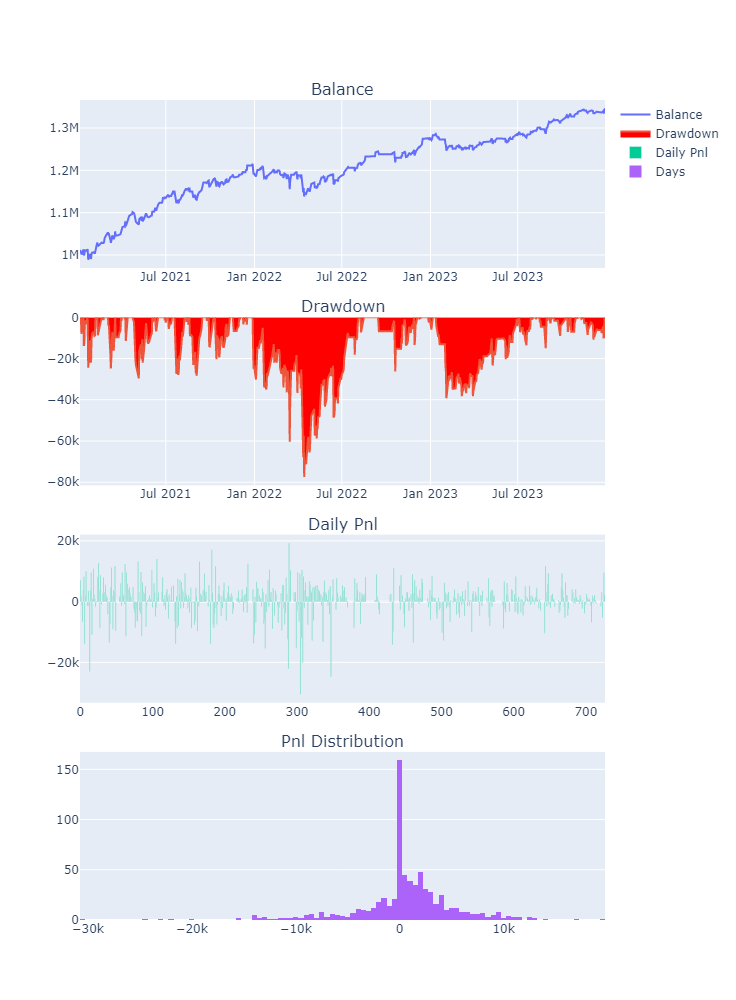

In [6]:
# 显示资金图表
engine.show_chart()

In [7]:
# 打印逐笔成交
for trade in engine.all_trades.values():
    print(trade.datetime, trade.vt_symbol, trade.direction.value, trade.offset.value, trade.volume, "@", trade.price)

2021-01-04 09:31:00+08:00 IO2101-P-5200.CFFEX 空 开 4 @ 72.0
2021-01-04 09:31:00+08:00 IO2101-C-5200.CFFEX 空 开 1 @ 105.8
2021-01-15 11:00:00+08:00 IO2101-P-5500.CFFEX 空 开 1 @ 29.4
2021-01-15 11:00:00+08:00 IO2101-C-5200.CFFEX 多 平 1 @ 282.4
2021-01-15 11:00:00+08:00 IO2101-C-5500.CFFEX 空 开 4 @ 10.8
2021-01-15 11:27:00+08:00 IO2101-P-5200.CFFEX 多 平 4 @ 0.2
2021-01-18 14:30:00+08:00 IO2102-P-5500.CFFEX 空 开 4 @ 130.4
2021-01-18 14:30:00+08:00 IO2102-C-5500.CFFEX 空 开 1 @ 165.6
2021-01-19 11:00:00+08:00 IO2102-P-5500.CFFEX 多 平 3 @ 143.8
2021-01-19 11:00:00+08:00 IO2102-C-5500.CFFEX 空 开 3 @ 140.0
2021-01-21 13:00:00+08:00 IO2102-P-5600.CFFEX 空 开 4 @ 156.6
2021-01-21 13:00:00+08:00 IO2102-P-5500.CFFEX 多 平 1 @ 110.2
2021-01-21 13:00:00+08:00 IO2102-C-5500.CFFEX 多 平 4 @ 191.4
2021-01-21 13:00:00+08:00 IO2102-C-5600.CFFEX 空 开 1 @ 145.0
2021-01-26 14:30:00+08:00 IO2102-P-5600.CFFEX 多 平 4 @ 173.0
2021-01-26 14:30:00+08:00 IO2102-P-5500.CFFEX 空 开 1 @ 116.4
2021-01-26 14:30:00+08:00 IO2102-C-5500.CFFEX